# Date-A-Scientist

This is a project from the [Codecademy](https://www.codecademy.com/learn) Data Science Career Path. 
The data comes from the dating app, Ok-Cupid. Users filled out a survey of multiple choice and short answer questions. We will explore the data and then try to cluster the users into groups with the expectation that good matches would be found either within groups, or between specific different groups. 
Finally, we will use some machine learning algorithms to try to predict someones asterological sign given other data about them!

In [207]:
import pandas as pd

# Import the csv file
profiles = pd.read_csv('profiles.csv')

In [208]:
# Preview the dataframe
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [209]:
# List the columns of the dataframe
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

Now we can visualize the distribution of responses for various questions to become acquainted with the data.

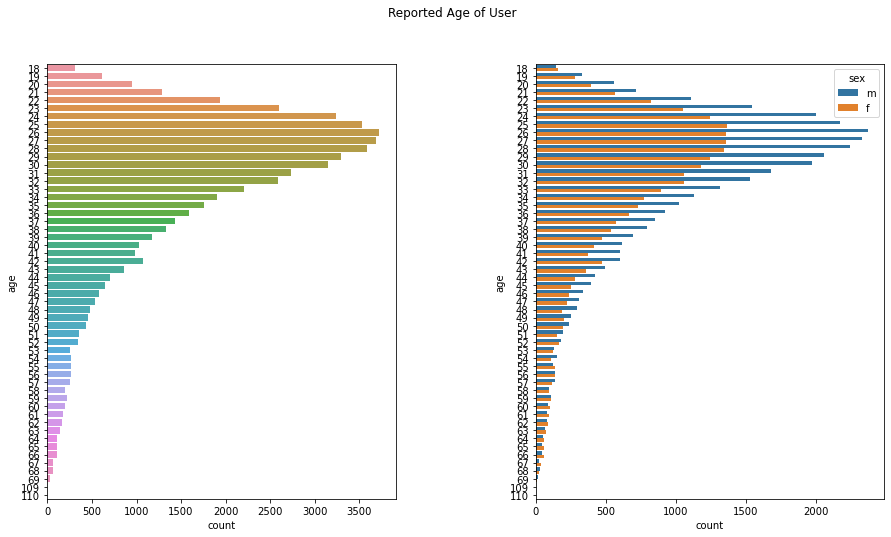

59946


In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the counts of age as well as age filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Age of User')
sns.countplot(data=profiles, y='age', ax=axs[0])
sns.countplot(data=profiles, y='age', hue='sex', ax=axs[1])
plt.show()
print(profiles['age'].shape[0] - profiles['age'].isna().sum())

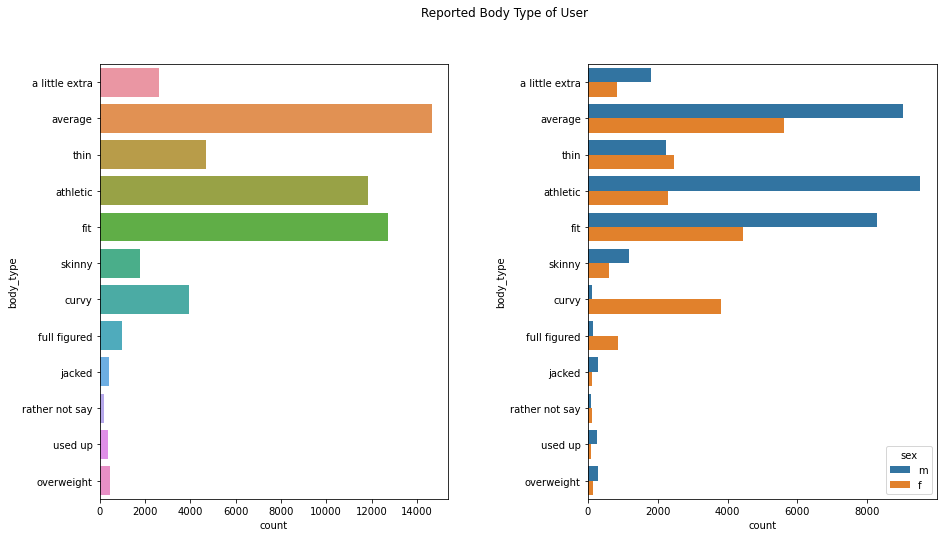

54650


In [211]:
# Plot the counts of body_type as well as body_types filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Body Type of User')
sns.countplot(data=profiles, y='body_type', ax=axs[0])
sns.countplot(data=profiles, y='body_type', hue='sex', ax=axs[1])
plt.show()
print(profiles['body_type'].shape[0] - profiles['body_type'].isna().sum())

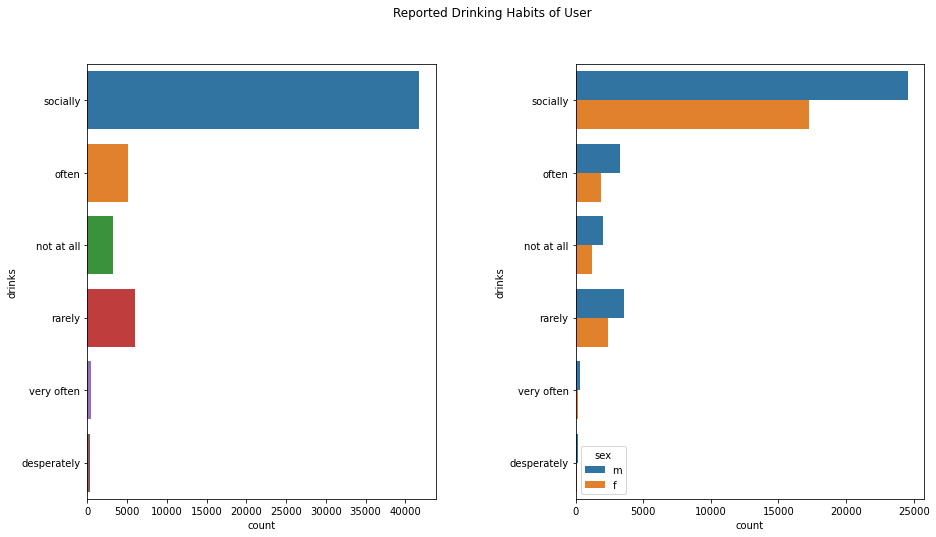

56961


In [212]:
# Plot the counts of drinks as well as drinks filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Drinking Habits of User')
sns.countplot(data=profiles, y='drinks', ax=axs[0])
sns.countplot(data=profiles, y='drinks', hue='sex', ax=axs[1])
plt.show()
print(profiles['drinks'].shape[0] - profiles['drinks'].isna().sum())

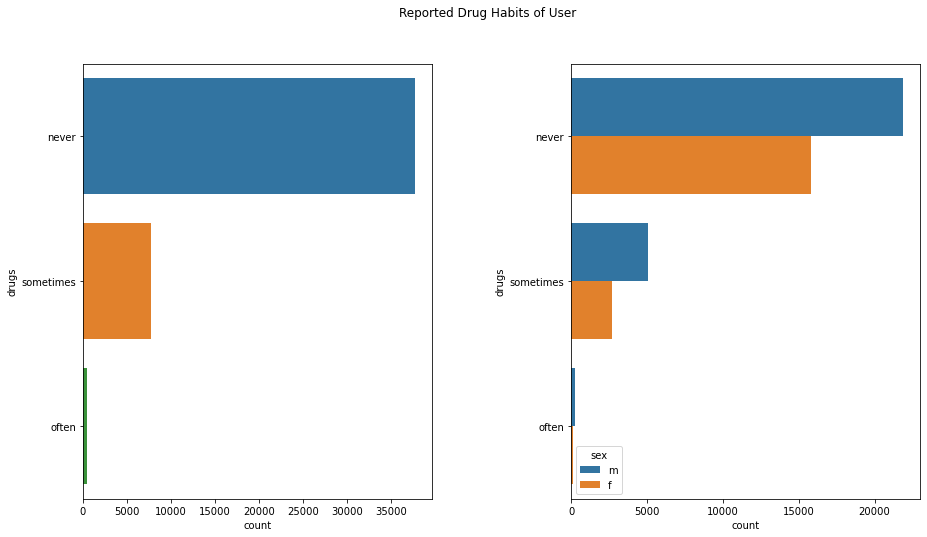

45866


In [213]:
# Plot the counts of drugs as well as drugs filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Drug Habits of User')
sns.countplot(data=profiles, y='drugs', ax=axs[0])
sns.countplot(data=profiles, y='drugs', hue='sex', ax=axs[1])
plt.show()
print(profiles['drugs'].shape[0] - profiles['drugs'].isna().sum())

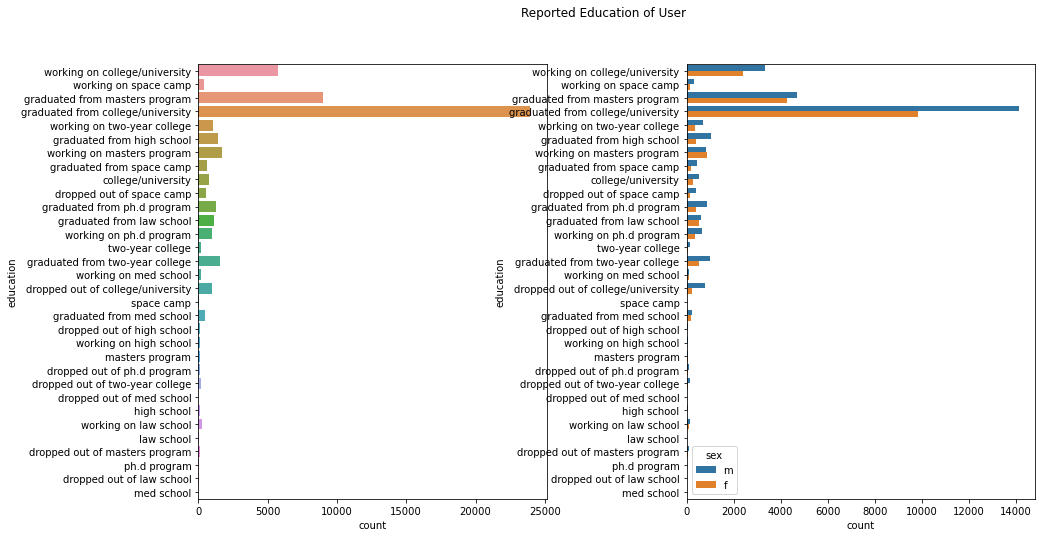

53318


In [214]:
# Plot the counts of education as well as education filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Education of User')
sns.countplot(data=profiles, y='education', ax=axs[0])
sns.countplot(data=profiles, y='education', hue='sex', ax=axs[1])
plt.show()
print(profiles['education'].shape[0] - profiles['education'].isna().sum())

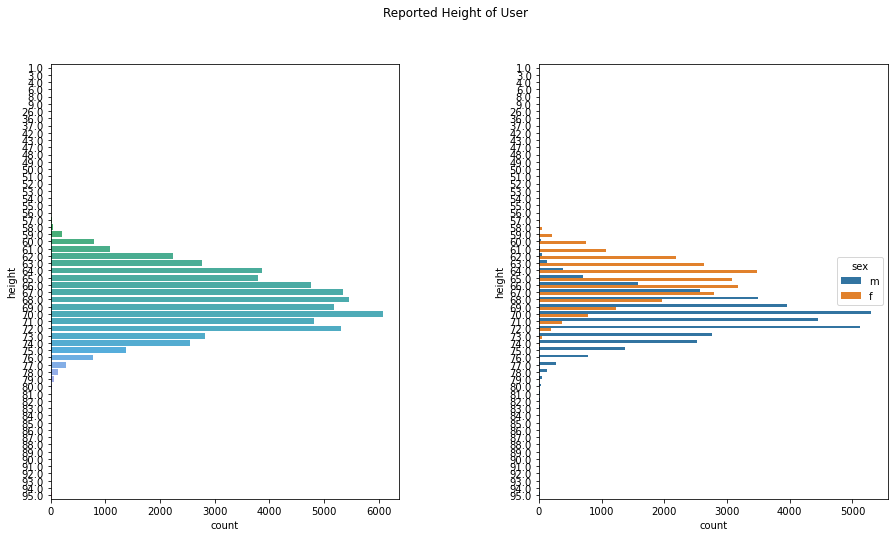

59943


In [215]:
# Plot the counts of height as well as height filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Height of User')
sns.countplot(data=profiles, y='height', ax=axs[0])
sns.countplot(data=profiles, y='height', hue='sex', ax=axs[1])
plt.show()
print(profiles['height'].shape[0] - profiles['height'].isna().sum())

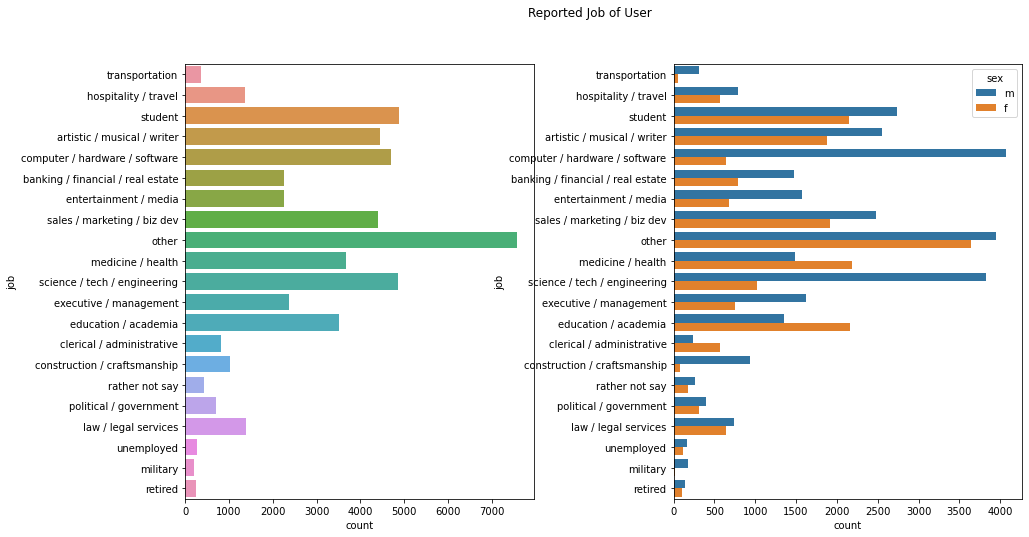

51748


In [216]:
# Plot the counts of job as well as job filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Job of User')
sns.countplot(data=profiles, y='job', ax=axs[0])
sns.countplot(data=profiles, y='job', hue='sex', ax=axs[1])
plt.show()
print(profiles['job'].shape[0] - profiles['job'].isna().sum())

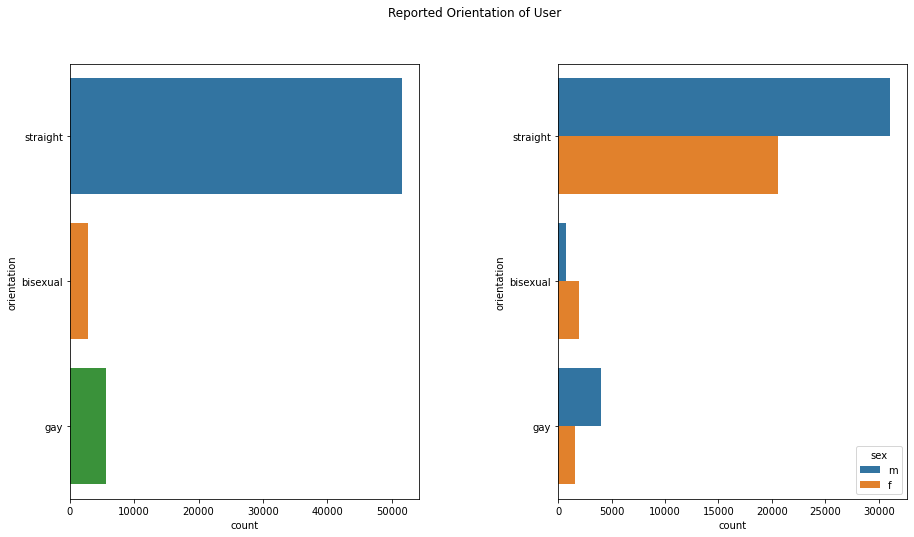

59946


In [217]:
# Plot the counts of orientation as well as orientation filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Orientation of User')
sns.countplot(data=profiles, y='orientation', ax=axs[0])
sns.countplot(data=profiles, y='orientation', hue='sex', ax=axs[1])
plt.show()
print(profiles['orientation'].shape[0] - profiles['orientation'].isna().sum())

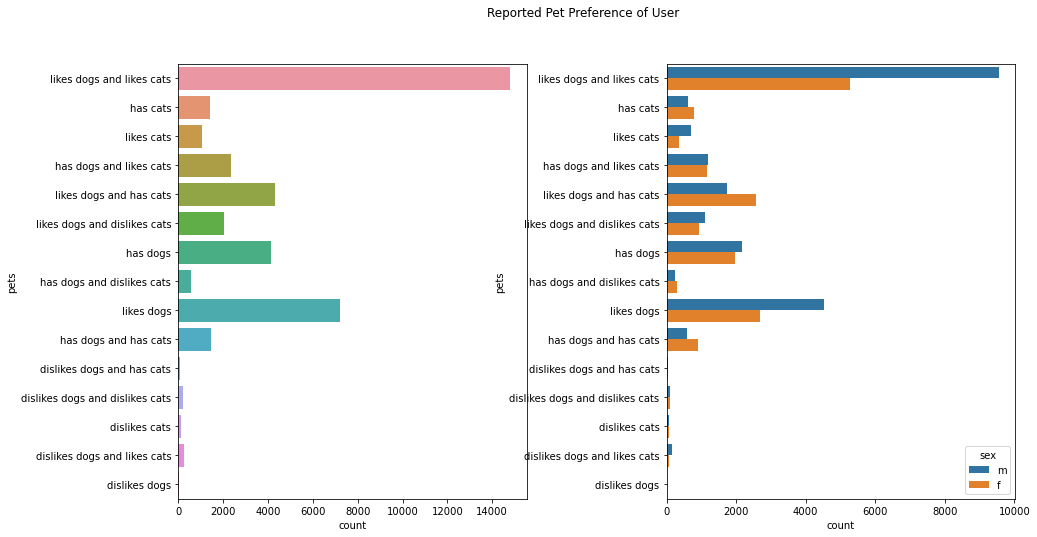

40025


In [218]:
# Plot the counts of pets as well as pets filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Pet Preference of User')
sns.countplot(data=profiles, y='pets', ax=axs[0])
sns.countplot(data=profiles, y='pets', hue='sex', ax=axs[1])
plt.show()
print(profiles['pets'].shape[0] - profiles['pets'].isna().sum())

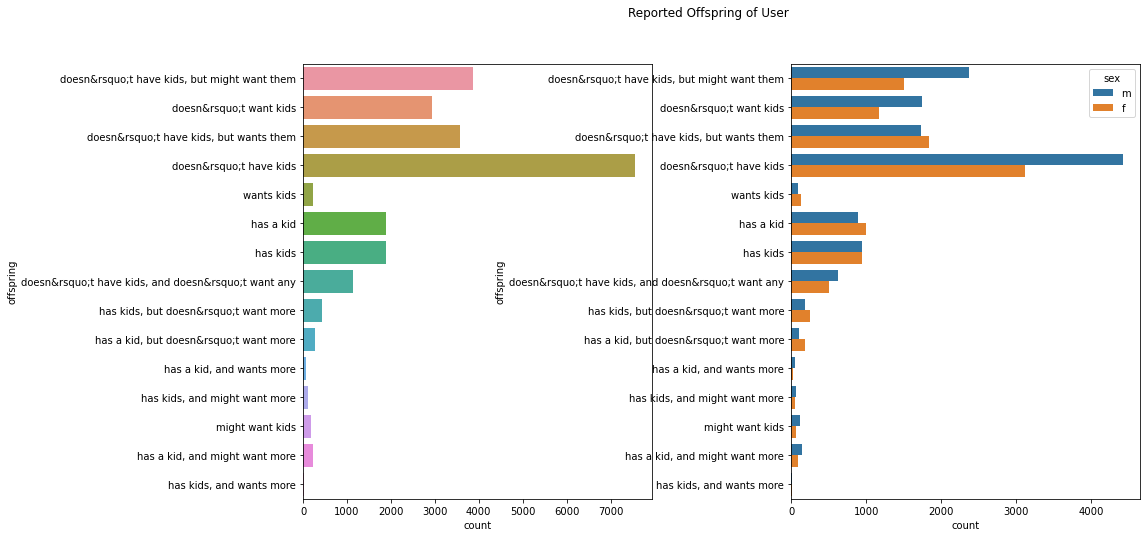

24385


In [219]:
# Plot the counts of offspring as well as offspring filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Offspring of User')
sns.countplot(data=profiles, y='offspring', ax=axs[0])
sns.countplot(data=profiles, y='offspring', hue='sex', ax=axs[1])
plt.show()
print(profiles['offspring'].shape[0] - profiles['offspring'].isna().sum())

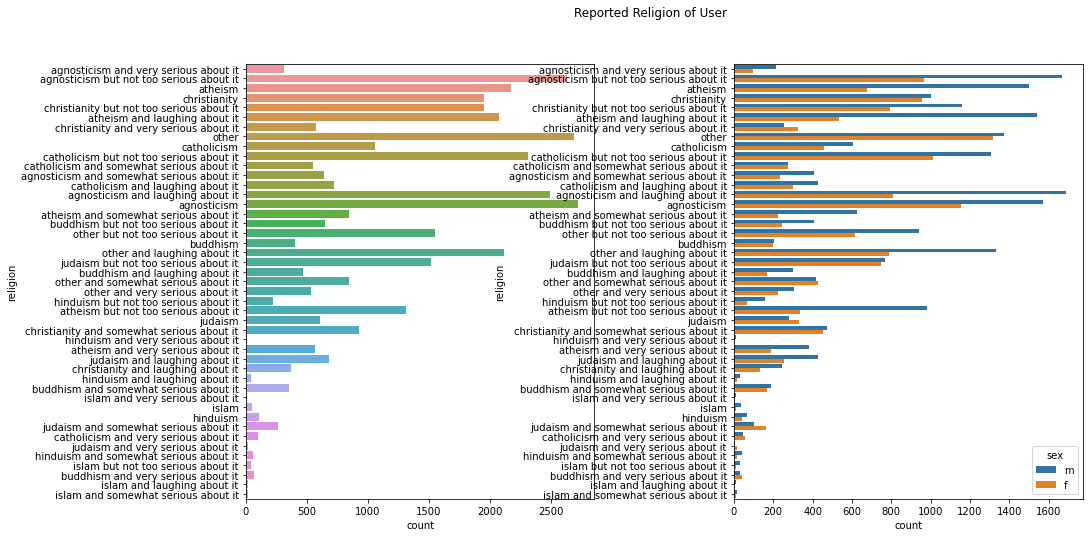

39720


In [220]:
# Plot the counts of religion as well as religion filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Religion of User')
sns.countplot(data=profiles, y='religion', ax=axs[0])
sns.countplot(data=profiles, y='religion', hue='sex', ax=axs[1])
plt.show()
print(profiles['religion'].shape[0] - profiles['religion'].isna().sum())

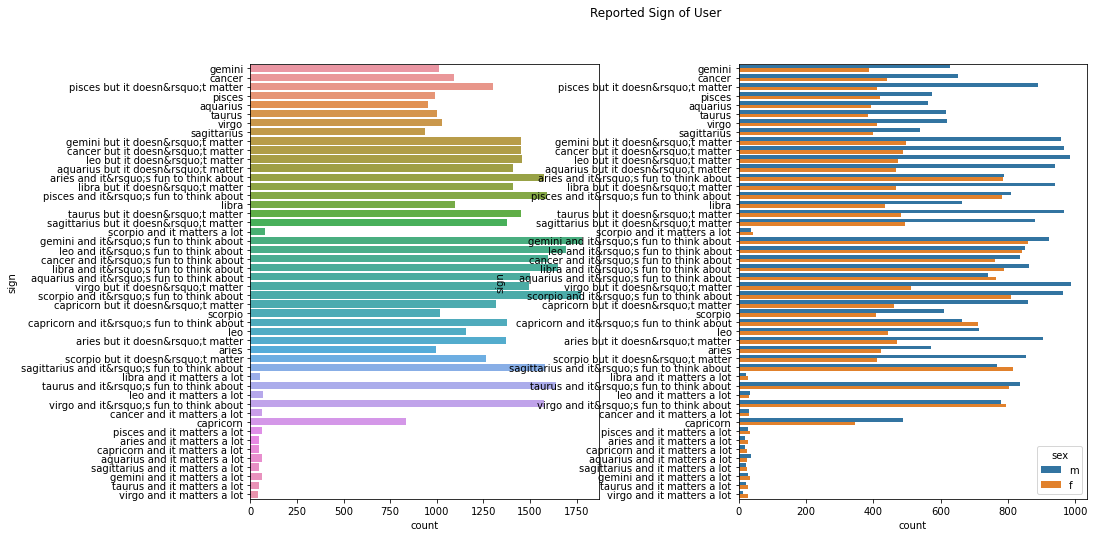

48890


In [221]:
# Plot the counts of sign as well as sign filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Sign of User')
sns.countplot(data=profiles, y='sign', ax=axs[0])
sns.countplot(data=profiles, y='sign', hue='sex', ax=axs[1])
plt.show()
print(profiles['sign'].shape[0] - profiles['sign'].isna().sum())

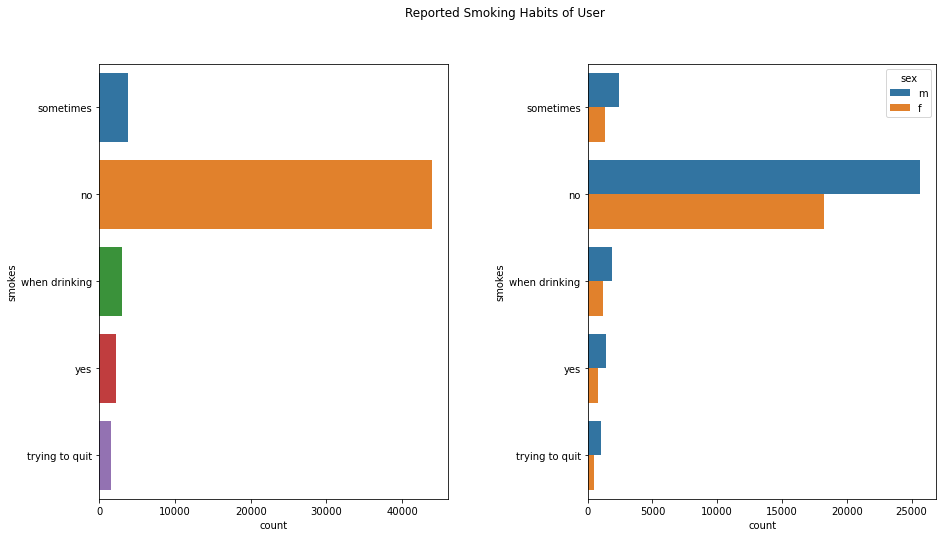

54434


In [222]:
# Plot the counts of smokes as well as smokes filtered by sex

fig, axs = plt.subplots(ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)

plt.suptitle('Reported Smoking Habits of User')
sns.countplot(data=profiles, y='smokes', ax=axs[0])
sns.countplot(data=profiles, y='smokes', hue='sex', ax=axs[1])
plt.show()
print(profiles['smokes'].shape[0] - profiles['smokes'].isna().sum())

### Features

Now that we have viewed some initial information about some of the questions in the survey, we can think about trying to predict the users sign from some other information in the survey. I propose to use the following features:
* Body type
* Diet
* Drinks
* Drugs
* Job
* Religion

For `Religion` I will clean the column to only repor the reported religion, and not their level of commitment to it. 

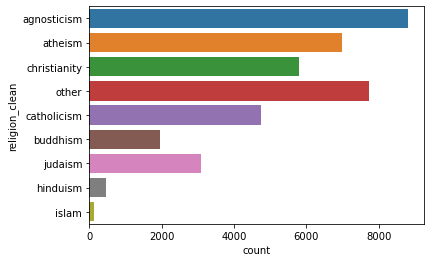

In [223]:
features = profiles[['body_type', 'diet', 'drinks', 'drugs', 'job', 'religion']].copy()

features['religion_clean'] = features.religion.str.split().str.get(0)
features.pop('religion')
sns.countplot(data=features, y='religion_clean')
plt.show()



### Labels

For the labels, I will use the `sign` column, but with the reported seriousness cleaned off.

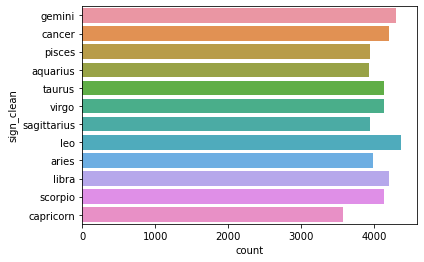

In [224]:
labels = profiles[['sign']].copy()
labels['sign_clean'] = labels.sign.str.split().str.get(0)
labels.pop('sign')
sns.countplot(data=labels, y='sign_clean')
plt.show()

Since these groups are fairly evenly distributed, we won't worry about stratifying the training/test set split.

### Splitting the data

I will now combine the targets and labels into a single dataframe, remove all columns with any na values, and split the data into a training and testing dataset.

In [225]:
data = pd.concat([features, labels], axis=1)
print(data.shape)
data = data.dropna()
print(data.shape)

(59946, 7)
(16433, 7)


Dropping the na values clearly removed a lot of data. To see which features cause the most instances to be dropped, we can look at the sum of the `isnull()` method called on `profiles`.

In [226]:
profiles.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

So `diet`, `drugs`, and `religion` are some of the least-answered questions, so it's possible that selecting these  columns is a poor choice as it limits our dataset. On the other hand, they could be more revealing about the sign of each individual. We should at least check that this filter did not unbalance the distribution of labels.

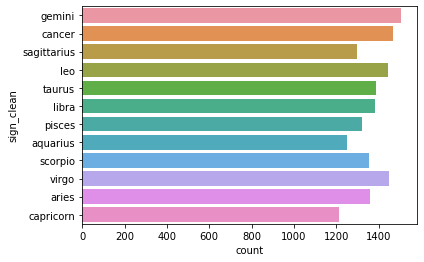

In [227]:
sns.countplot(data=data, y='sign_clean')
plt.show()

The dataset still looks fairly balanced, so it doest't seem like answereing any of these questions revelaed much information about the sign of the individual.

Now we should convert all data types from strings into numeric values. A good way to do this with categorical data, such as we have here, is with dummy variables.

In [228]:
features = data[['body_type', 'diet', 'drinks', 'drugs', 'job', 'religion_clean']]
targets = data[['sign_clean']]

cols = features.columns
for col in cols:
    features = pd.get_dummies(features, columns=[col], prefix=[col])
    
features.head()

,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,...,job_unemployed,religion_clean_agnosticism,religion_clean_atheism,religion_clean_buddhism,religion_clean_catholicism,religion_clean_christianity,religion_clean_hinduism,religion_clean_islam,religion_clean_judaism,religion_clean_other
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Now we can split the data into training and testing sets.

In [229]:
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets
train_features, test_features, train_targets, test_targets = train_test_split(features, targets)




### Building Models for Prediction

Now that we have our selected data split into training and testing sets, it is time to select the models we will train.

We will try a *Decision Tree Classifier*, a *K Nearest Neighbors*, and a *Logistic Regression* model to predict the sign of an individual. Since all of these have some hyperparameters to select, we will split the training set into training and validation sets to help decide upon the optimal hyperparameter settings. 

In [230]:
train_X, val_X, train_Y, val_Y = train_test_split(train_features, train_targets)


In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

For the *Decision Tree Classifier* we would like to consider adjusting the max depth parameter. We will rerun the fitting of the model on the training set with varrying values for this parameter and then validating on the validation set. We will select the best performance on validation set, then retrain the model on the combination of the training and validation sets and finally evaulate on the testing set.

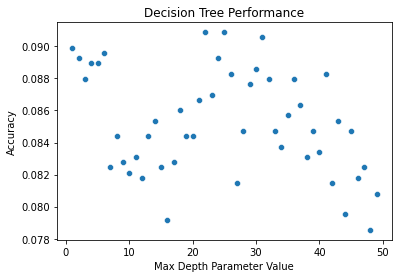

In [232]:
import numpy as np

# Array of max_depth parameter values
max_depths = np.arange(1,50)

# List to store accuracy of model on validataion set
acc = []

for depth in max_depths:
    DT_classifier = DecisionTreeClassifier(max_depth=depth, random_state=15217)
    DT_classifier.fit(train_X, train_Y)
    acc.append(DT_classifier.score(val_X, val_Y))

sns.scatterplot(x=max_depths, y=acc)
plt.title('Decision Tree Performance')
plt.xlabel('Max Depth Parameter Value')
plt.ylabel('Accuracy')
plt.show()
    

It appears the Decision Tree model performs best when the max_depth is set to 2. However, the accuracy, is still quite low, at only 9.8%, when a random choice would be 1/12, or 8.33%. 

Let's try KNN model. For this model, we will adjust the n_neighbors parameter.

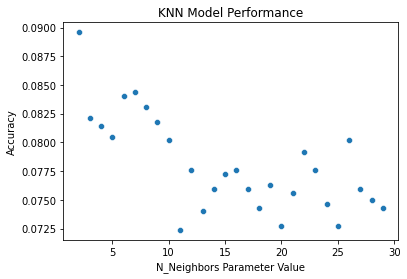

In [233]:
# Array of n_neighbors parameter values
k_values = np.arange(2,30)

# List to store accuracy of model on validataion set
acc = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_X, train_Y.to_numpy().ravel())
    acc.append(knn_classifier.score(val_X, val_Y.to_numpy().ravel()))
    
sns.scatterplot(x=k_values, y=acc)
plt.title('KNN Model Performance')
plt.xlabel('N_Neighbors Parameter Value')
plt.ylabel('Accuracy')
plt.show()

Again, this model still doesn't perform well, but the best value for n_neighbors appears to be 5, but there seems to be a high level of randomness to this, as a value of 6 appears to be one of the worst selections.

Finally, we will try a logistic regression model. For this model, we will only adjust the multi_class parameter. We will use the l1 penalty with the saga solver.


In [234]:
logistic_model_ovr = LogisticRegression(random_state=15217, multi_class = 'ovr', penalty='l1', solver='saga')
logistic_model_multi = LogisticRegression(random_state=15217, multi_class = 'multinomial', penalty='l1', solver='saga')

logistic_model_ovr.fit(train_X, train_Y.to_numpy().ravel())
logistic_model_multi.fit(train_X, train_Y.to_numpy().ravel())

print('The model accuracy with a ovr parameter is:')
print(logistic_model_ovr.score(val_X, val_Y.to_numpy().ravel()))
print('\nThe model accuracy with a multinomial parameter is:')
print(logistic_model_multi.score(val_X, val_Y.to_numpy().ravel()))



The model accuracy with a ovr parameter is:
0.08893216488153197

The model accuracy with a multinomial parameter is:
0.08828302499188576


So out of all of these, it appears a shallow decision tree performs best, even though all performances are quite poor. We will fit a shallow decision tree with both the training and validation sets.

In [235]:
# Concat training and validation sets
train_and_val_X = pd.concat([train_X, val_X], axis=0)
train_and_val_Y = pd.concat([train_Y, val_Y], axis=0)

DT_classifier = DecisionTreeClassifier(max_depth=2, random_state=15217)
DT_classifier.fit(train_and_val_X, train_and_val_Y)
DT_classifier.score(test_features, test_targets)


0.09174981747383791

### Final Results

So...after all that, we are essentially just as well off randomly guessing someones sign.

How about we try a different approach.  What if we used the individuals own words to help determine what their sign was. After all, if someone's sign impacts their personality, it may be revealed in their writing.  Luckily we have some writing samples for each individual in the form of their essay responses. For this analysis, we won't attempt to analyze their response to each prompt, but rather what words and combination of words they use. Therefore, we can combine all essay responses into one.

In [269]:
# Get all essay responses and sign from each respondent
features = profiles[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'sign']].copy()
# Replace 'na' entries with a blank space
features = features.fillna(' ')

In [270]:
# Combine all essay responses into one column
features['combined_essays'] = features[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5','essay6', 'essay7','essay8', 'essay9']].agg(' '.join, axis=1)

In [271]:
# Create a cleaned sign column and remove the sign column
features['sign_clean'] = features.sign.str.split().str.get(0)
features.pop('sign')
features.head()

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,combined_essays,sign_clean
0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,about me:<br />\n<br />\ni would love to think...,gemini
1,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,,,i am very open and will share just about anyth...,,i am a chef: this is what that means.<br />\n1...,cancer
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...","i'm not ashamed of much, but writing public te...",pisces
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",,cats and german philosophy,,,you feel so inclined.,i work in a library and go to school. . . read...,pisces
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",,,,,,hey how's it going? currently vague on the pro...,aquarius


In [272]:
# Convert signs into coded labels
features['sign_id'], decode = pd.factorize(features['sign_clean'])
features.head()

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,combined_essays,sign_clean,sign_id
0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,about me:<br />\n<br />\ni would love to think...,gemini,0
1,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,,,i am very open and will share just about anyth...,,i am a chef: this is what that means.<br />\n1...,cancer,1
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...","i'm not ashamed of much, but writing public te...",pisces,2
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",,cats and german philosophy,,,you feel so inclined.,i work in a library and go to school. . . read...,pisces,2
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",,,,,,hey how's it going? currently vague on the pro...,aquarius,3


In [277]:
features = features[['combined_essays', 'sign_id', 'sign_clean']].copy()
# Get rid of entries without a sign
features = features[features['sign_id'] != -1]

# Create dictionaries to transform between signs and sign_id
signs_df = features[['sign_clean', 'sign_id']].drop_duplicates().sort_values('sign_id')
sign_to_id = dict(signs_df.values)
id_to_sign = dict(signs_df[['sign_id', 'sign_clean']].values)

# Replace any entries that have *only* whitespace with nan
features = features.replace(r'^\s*$', np.nan, regex=True)
#Remove any entries with any na values
features = features.dropna()
features.shape


(47420, 3)

### Cleaning the text

So now we have a dataset containing essay test and the person's sign. We will want to perform an analysis on the words each person wrote, which means we want to make sure to ignore things like url links, new line codes, and html formatting.

In [278]:
import re
from bs4 import BeautifulSoup

def essay_cleaner(essay):

    # Remove URLs
    url_pattern = '(http|www\.)[^\s]+'
    # Remove new line characters
    new_line_pattern = '\\\\n'
    # Combine patterns
    combined_pattern = '|'.join([url_pattern, new_line_pattern])
    essay = re.sub(combined_pattern, '', essay)
    # Remove extra whitespace
    essay = re.sub(' +', ' ', essay)
    # Strip HTML
    essay = BeautifulSoup(essay, 'html.parser').get_text()
        
    return essay

In [281]:
stripped_features = features.copy()
stripped_features['combined_essays'] = stripped_features['combined_essays'].map(essay_cleaner)


kudos to [Michael Fryar](https://github.com/mefryar/opioid-stigma-nlp)

Now we will further clean and normalize the essay text by removing stop words, removing non-ascii characters, expand contractions, then tokenize and lemmatize the text!

In [282]:
import unicodedata
import nltk
from nltk.stem import WordNetLemmatizer
from contractions import CONTRACTION_MAP

stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_non_ascii_chars(text):
    """Remove non-ASCII characters from list of tokenized words"""
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    """Expand contractions in string of text"""
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


def remove_special_characters(text, remove_digits=False):
    """Remove all characters except for letters and spaces"""
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def lemmatize(words):
    """Lemmatize nouns and verbs in list of tokenized words"""    
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='n')
        lemma = lemmatizer.lemmatize(lemma, pos='v')
        lemmas.append(lemma)
    
    joined_lemmas = ' '.join(lemmas)
    return joined_lemmas


def normalize_text(doc):
    """Normalize text document by applying helper functions.""" 
    # Replace hypens and forward slashes with spaces
    doc = re.sub('\-|\/', ' ', doc)
    # Replace non-standard single quote
    doc = doc.replace('’', "'")
    # Remove non-ASCII characters
    doc = remove_non_ascii_chars(doc)
    # Expand contractions    
    doc = expand_contractions(doc)
    # Lowercase the text    
    doc = doc.lower()
    # Remove special characters and digits    
    special_char_pattern = re.compile(r'([{.(-)!}])')
    doc = special_char_pattern.sub(" \\1 ", doc)
    doc = remove_special_characters(doc, remove_digits=True)  
    # Tokenize for stopword removal and lemmatization
    words = doc.split()
    # Remove stopwords
    filtered_words = [word for word in words if word not in stopword_list]
    # Lemmatize text
    normalized_text = lemmatize(filtered_words)
        
    return normalized_text

In [283]:
# Rename combined_essays
stripped_features.rename(index=str, columns={'combined_essays': 'combined_essays_full'}, inplace=True)

# Normalize combined_essays
stripped_features['combined_essays_norm'] = stripped_features['combined_essays_full'].map(normalize_text)

# Check
stripped_features.head()

,combined_essays_full,sign_id,sign_clean,combined_essays_norm
0,about me:\n\ni would love to think that i was ...,0,gemini,would love think kind intellectual either dumb...
1,i am a chef: this is what that means.\n1. i am...,1,cancer,chef mean workaholic love cook regardless whet...
2,"i'm not ashamed of much, but writing public te...",2,pisces,not ashamed much write public text online date...
3,i work in a library and go to school. . . read...,2,pisces,work library go school read thing write old de...
4,hey how's it going? currently vague on the pro...,3,aquarius,hey go currently vague profile know come soon ...


We can look at an example essay now to see how this transformed the text.

In [284]:
stripped_features['combined_essays_norm'][20]

'name ashley live san francisco love dance speak spanish smile enjoy life graduate usf major international study major minor latin american study dance go work ymca camp summer assistant director go since pretty much come full circle not entire life plan goal future count something mostly plan happy whatever continue fun life smile eye hair apparently not picky tend enjoy comedy silly reality show music groove food taste good go city friend like happy fun genuine nice person active like try new thing'

In [285]:
stripped_features['combined_essays_full'][20]

"my name is ashley and i live in san francisco. i love to dance,\nspeak spanish, smile, and enjoy life! :) i just graduated from usf with a major in international studies\nmajor, and minors in latin american studies and dance. i'm going to\nwork at a ymca camp this summer as the assistant director. i've\nbeen going there since i was 10 so i've pretty much come full\ncircle. i don't have my entire life planned out but i do have goals\nfor the future so that counts for something. mostly my plan is to\nbe happy with whatever i do and continue to have fun in life! my smile. my eyes, and my hair apparently. i'm not picky...but i tend to enjoy comedies, silly reality shows,\nmusic i can groove to, and food that tastes good. going out in the city with friends. -you like to be happy and have fun. -you are a genuine, nice\nperson. -you are active and like to try new things."

### TF-IDF Vectorizer

To do an analysis on word choice, we can use the tfid vectorizer method. This is equivalent to counting up the frequncy of each word used in the corpus and then applying a tf-idf transformer, which stands for term-frequency times inverse document-frequency. The objective of this is to implement a weighting scheme to scale down the impact of a word being heavily used in a corpus, which would imply it is less significant. For example, the word 'love' is likely to be found quite often in this exercise (compared to other corpus'), since all text comes from dating profiles. Therefore, seeing the word 'love' appear in someone's response may not be too significant, so we don't want to over-weight that terms use.

We will analyze both unigrams and bigrams (1 and 2 word sets). To keep our feature space small enough to work with, we will only count the n-grams that appear over 200 times in the total corpus.

In [286]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=200, norm='l2', ngram_range=(1, 2), stop_words='english')
tfidf_features = tfidf.fit_transform(features.combined_essays).toarray()
labels = features.sign_id
tfidf_features.shape

(47420, 8498)

### N-gram analysis

We can use a chi^2 test to see which n-grams are most correlated with each sign. Some of these are obvious, such as leos using the word 'leo' relatively often, but most may not seem predictible.

Kudos to [Susan Li](https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f)

In [287]:
from sklearn.feature_selection import chi2
import numpy as np

N = 3
for sign, sign_id in sorted(sign_to_id.items()):
  features_chi2 = chi2(tfidf_features, labels == sign_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(sign))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'aquarius':
  . Most correlated unigrams:
. returning
. bridge
. bs
  . Most correlated bigrams:
. notice smile
. love mexican
. like active
# 'aries':
  . Most correlated unigrams:
. motown
. websites
. treats
  . Most correlated bigrams:
. day like
. love new
. music family
# 'cancer':
  . Most correlated unigrams:
. bare
. odd
. cancer
  . Most correlated bigrams:
. electronic music
. br finally
. york times
# 'capricorn':
  . Most correlated unigrams:
. bees
. focused
. designer
  . Most correlated bigrams:
. rage machine
. passionate br
. coffee br
# 'gemini':
  . Most correlated unigrams:
. idk
. defense
. sparks
  . Most correlated bigrams:
. wizard oz
. cream br
. don mean
# 'leo':
  . Most correlated unigrams:
. succeed
. 2c
. leo
  . Most correlated bigrams:
. things need
. count monte
. things better
# 'libra':
  . Most correlated unigrams:
. sister
. urge
. approachable
  . Most correlated bigrams:
. know ll
. love sports
. like old
# 'pisces':
  . Most correlated unigram

# Model Building

Now we will attempt to build a model which can predict an individual's sign from only their essays written on a dating profile.

First we will split the dataset into training and testing sets.

Then similar to before, we will utilize a *Decision Tree*, a *K-Nearest Neighbors* and a *Logistic Regression* model. 

We will again split the training set into training and validation sets to tune any parameters.



In [292]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, random_state = 15217)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)


### Decision Tree Classifier

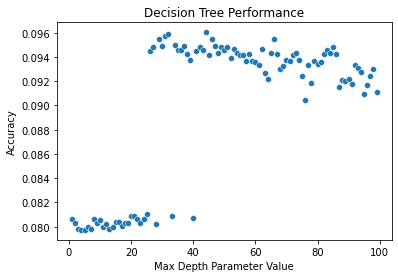

In [295]:
# Array of max_depth parameter values
max_depths = np.arange(1,100)

# List to store accuracy of model on validataion set
acc = []

for depth in max_depths:
    DT_classifier = DecisionTreeClassifier(max_depth=depth, random_state=15217)
    DT_classifier.fit(X_train, y_train)
    acc.append(DT_classifier.score(X_val, y_val))

sns.scatterplot(x=max_depths, y=acc)
plt.title('Decision Tree Performance')
plt.xlabel('Max Depth Parameter Value')
plt.ylabel('Accuracy')
plt.show()
    

### K-Nearest Neighbors Classifier

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


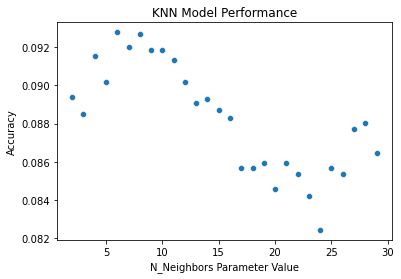

In [297]:
# Array of n_neighbors parameter values
k_values = np.arange(2,30)

# List to store accuracy of model on validataion set
acc = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train.to_numpy().ravel())
    acc.append(knn_classifier.score(X_val, y_val.to_numpy().ravel()))
    print(k)
    
sns.scatterplot(x=k_values, y=acc)
plt.title('KNN Model Performance')
plt.xlabel('N_Neighbors Parameter Value')
plt.ylabel('Accuracy')
plt.show()

### Logistic Regression Classifier

In [298]:
logistic_model_ovr = LogisticRegression(random_state=15217, multi_class = 'ovr', penalty='l1', solver='saga')
logistic_model_multi = LogisticRegression(random_state=15217, multi_class = 'multinomial', penalty='l1', solver='saga')

logistic_model_ovr.fit(X_train, y_train.to_numpy().ravel())
logistic_model_multi.fit(X_train, y_train.to_numpy().ravel())

print('The model accuracy with a ovr parameter is:')
print(logistic_model_ovr.score(X_val, y_val.to_numpy().ravel()))
print('\nThe model accuracy with a multinomial parameter is:')
print(logistic_model_multi.score(X_val, y_val.to_numpy().ravel()))



/Users/john/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The model accuracy with a ovr parameter is:
0.08524516419253261

The model accuracy with a multinomial parameter is:
0.08457040035987404


From the Decision Tree, it is interesting to note the discontinuity between those trees with a validation accuracy of ~8.1% and those with accuracy of ~9.4%. I'm not sure why that feature exists. 

The KNN algorithm took quite a while to complete, hence the printing of each k value to track its progress. It looks to have initially underfit the data, then reached an optimal parameterization around k=6 and then started to overfit on the training data as k increased.

The logistic regression model did not perform very well and in fact exceeded its max_iteration threshold due to non-convergence.

The best performing model out of these appears to be the decision tree, with a max_depth parameter value of about 45 to try to select one of the best performing decision trees, that is outside of the range of those lesser performing. 

I will train a single decision tree with both the training and validation data, and then finally evaluate it on the testing set.

## Final model evaluation

In [302]:
# Concat training and validation sets
X_train_and_val = np.concatenate([X_train, X_val], axis=0)
y_train_and_val = np.concatenate([y_train, y_val], axis=0)

DT_classifier = DecisionTreeClassifier(max_depth=45, random_state=15217)
DT_classifier.fit(X_train_and_val, y_train_and_val)
print(DT_classifier.score(X_test, y_test))

0.08722058203289751


## Conclusion

In conclusion, none of the feature selection and model building methods I attempted performed better than a random classifier in trying to predict an individual's sign from infomration on their dating profile. This is not to say this task is impossible, but simply that none of the methods I undertook had any real predictive capabilities. 